In [1]:
# Inhomogén lineáris egyenletrendszer egyértelmű megoldása Ax = b
#piaci vásárlás: alma 200, körte 500, citrom 300
A =[1,2,3;4,5,7;2,3,5]
b =[2100;5400;3400]
det(A)
x=inv(A)*b
A*x #ellenőrzés

A =

   1   2   3
   4   5   7
   2   3   5

b =

   2100
   5400
   3400

ans = -2
x =

   200.00
   500.00
   300.00

ans =

   2100.0
   5400.0
   3400.0



In [2]:
#Túlhatározott lineáris egyenletrendszer megoldása

A =[1,2,3;4,5,7;2,3,5;6,8,9;2,2,1;1,2,1]; #túlhatározott
b =[2100;5400;3400;7900;1700;1500];
x=inv(A'*A)*A'*b

x =

   200.00
   500.00
   300.00



In [3]:
#Konstans tag szerepeltetése az e.h. mátrixban 

bz=b+20
A(:,4)=1 
x=inv(A'*A)*A'*bz

bz =

   2120
   5420
   3420
   7920
   1720
   1520

A =

   1   2   3   1
   4   5   7   1
   2   3   5   1
   6   8   9   1
   2   2   1   1
   1   2   1   1

x =

   200.000
   500.000
   300.000
    20.000



#### Inhomogén lineáris egyenletrendszer egyértelmű megoldása - Cramer szabály

$Ax=b$<br>
$Ac_{i}$ mátrix: az $A$ együttható mátrix $i$-edik oszlopát helyettesítjük a $b$ eredményvektorral:
$\scriptsize Ac_{i}=\begin{bmatrix}
a_{11} & \ldots&b_{1}&\ldots& a_{1n}\\
a_{21} & \ldots&b_{2}&\ldots& a_{2n}\\
\vdots & \vdots&\vdots&\vdots& \vdots\\
a_{n1} & \ldots&b_{n}&\ldots& a_{nn}
\end{bmatrix}$<br>
$x_{i}=\frac{\mathrm{det}(Ac_{i})}{\mathrm{det}(A)}$

In [4]:
A = resize(A,4,4)
b = resize(bz,4,1)

Ac1=A;
Ac1(:,1)=b;
det(Ac1)/det(A)

Ac4=A;
Ac4(:,4)=b;
det(Ac4)/det(A)

A =

   1   2   3   1
   4   5   7   1
   2   3   5   1
   6   8   9   1

b =

   2120
   5420
   3420
   7920

ans =  200.00
ans =  20.000


#### Valószínűségi változó függvényének eloszlása <br>

$\displaystyle f_{y}(Y) = f_{x}(x(Y))\frac{\mathrm{d}x}{\mathrm{d}y}=f_{x}\circ x(Y)\frac{\mathrm{d}x}{\mathrm{d}y}$<br>
ellenőrzéshez: sűrűségfüggvény tulajdonsága volt: $\int\limits_{\infty}^{\infty}f(t)\mathrm{d}t=1$

a) $f_{x}=\lambda\mathrm{e}^{-\lambda x}$, $\lambda=1$ paraméterű exponenciális eloszlású sűrűségfv.<br> 
$\frac{\mathrm{d}x}{\mathrm{d}y}$   (x=x(y) deriválása y szerint)<br>
$y = \sqrt{x}\rightarrow$ $x=y^{2}\rightarrow\frac{\mathrm{d}x}{\mathrm{d}y}=2y$ <br>
$f_{y} = 2y\;\mathrm{e}^{-y^{2}}$

intx =  0.94848
inty =  0.99833


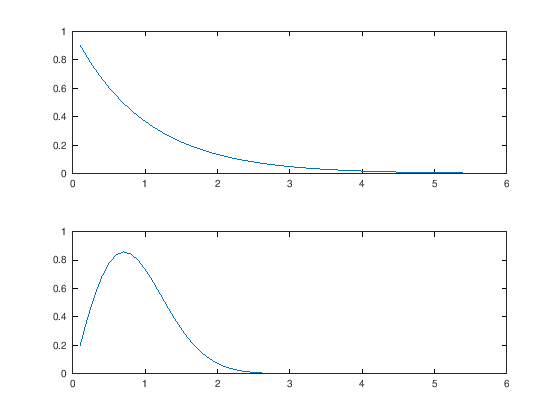

In [5]:
# x és y kölcsönösen egyértelmű függvények adott szakaszon: egymás inverzei adott szakaszon
# ha az egyik eloszlása ismert (fx) akkor a másik eloszlása számítható (fy) 

clear
for i=1:60 x(i)=0.1*i; endfor; 
#for i=1:60 fx(i)=exp(-x(i)); endfor;
fx = exp(-x);

for i=1:60 y(i)=0.1*i; endfor; 
#for i=1:60 fy(i)=2*y(i)*exp(-y(i)*y(i)); endfor; 
fy = 2*y .* exp(-y .^ 2);

intx=sum(fx)*0.1 #görbe alatti terület ellenőrzése -téglányösszeg
inty=sum(fy)*0.1 #görbe alatti terület ellenőrzése 

subplot (2, 1, 1)
plot (x,fx)
subplot (2, 1, 2)
plot (y,fy)

b) $x$ standard normális eloszlású: $f_{x}=\frac{1}{\sqrt{2\pi}}\mathrm{e}^{-\frac{x^{2}}{2}}$<br> 
$y = x^{2}\rightarrow$ $x=\sqrt{y}\rightarrow\frac{\mathrm{d}x}{\mathrm{d}y}=\frac{1}{2\sqrt{y}}$ <br>

$\displaystyle f_{y}=f_{x}\circ x(Y)\frac{\mathrm{d}x}{\mathrm{d}y}=\frac{1}{\sqrt{2\pi}}\mathrm{e}^{-\frac{y}{2}}\;\frac{1}{2\sqrt{y}}$

ans =  0.46011
ans =  0.92021
ans =  0.74313
ans =  0.94313


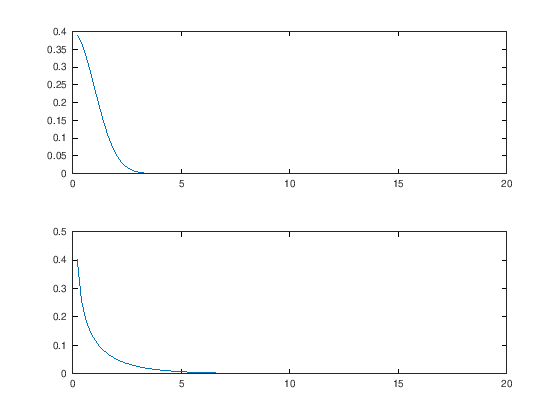

In [6]:
clear

for i=1:100 x(i)=0.2*(i); endfor; #0.2...20
for i=1:100 fx(i)=1/sqrt(2*pi)*exp(-x(i)*x(i)/2); endfor;
#fx = 1/sqrt(2*pi)*exp(-x .^ 2 / 2);

for i=1:100 y(i)=0.2*(i); endfor; #0.2...20
for i=1:100 fy(i)=1/sqrt(2*pi)*exp(-y(i)/2)*(1/2/sqrt(y(i))); endfor;
#fy = 1/sqrt(2*pi)*exp(-y / 2) .* (1./(2*sqrt(y)));

sum(fx)*0.2 # fél gauss-t integráltunk, szükséges 2-vel szorozni
sum(fx)*0.2*2

# emiatt fy téglányösszeget is szorozzuk 2-vel 
sum(fy)*0.2*2 # miért kapunk 0.74313-t? 
sum(fy)*0.2*2+0.2 # hozzáadunk 0.2 (téglányösszegből adódó pontatlanság)

subplot (2, 1, 1)
plot (x,fx)
subplot (2, 1, 2)
plot (y,fy)

#### Gauss-féle hibaterjedési szabály 
$y=f(x_{1},\ldots,x_{n})$ sokváltozós fv.<br>
$(x_{1},\ldots,x_{n})\rightarrow(\xi_{1},\ldots,\xi_{n})$ \[nem ismert $\boldsymbol{x}$ változók becslése $\boldsymbol{\xi}$ valószínűségi változókkal\]<br>
$(\xi_{1},\ldots,\xi_{n})$ mindegyikéhez számolható: <br>
>$(E_{1},\ldots,E_{n})$ becsült várható érték,<br>
>$(s_{1},\ldots,s_{n})$ becsült szórás,<br>
>$(s_{1}^{2},\ldots,s_{n}^{2})$ becsült variancia, <br>
>$(s_{11}^{2},s_{12}^{2}\ldots,s_{1n}^{2},s_{21}^{2}\ldots,s_{nn}^{2})$ becsült kovariancia<br>

Kérdés: $s_{y}^{2}$ ($y$ varianciája)?

Válasz: $s_{y}^{2}=\sum\limits_{i=1}^{n}\left(\frac{\partial y}{\partial x_{i}}\right)^{2}s_{i}^{2}+2\sum\limits_{i<j}\sum\limits_{j=1}^{n}\left(\frac{\partial y}{\partial x_{i}}\right)\left(\frac{\partial y}{\partial x_{j}}\right)s_{ij}^{2}=\sum\limits_{i=1}^{n}\sum\limits_{j=1}^{n}\left(\frac{\partial y}{\partial x_{i}}\right)\left(\frac{\partial y}{\partial x_{j}}\right)s_{ij}^{2}$


Mi található a képletben:<br>
parciális deriváltak szorzatából álló mátrix ($PD$), kihasználva, hogy szimmetrikus megadható tömörebb alakban:

$PD=\begin{bmatrix}
\left(\frac{\partial y}{\partial x_{1}}\right)\left(\frac{\partial y}{\partial x_{1}}\right)&\left(\frac{\partial y}{\partial x_{1}}\right)\left(\frac{\partial y}{\partial x_{2}}\right)&\left(\frac{\partial y}{\partial x_{1}}\right)\left(\frac{\partial y}{\partial x_{3}}\right)\\
\left(\frac{\partial y}{\partial x_{2}}\right)\left(\frac{\partial y}{\partial x_{1}}\right)&\left(\frac{\partial y}{\partial x_{2}}\right)
\left(\frac{\partial y}{\partial x_{2}}\right)&\left(\frac{\partial y}{\partial x_{2}}\right)\left(\frac{\partial y}{\partial x_{3}}\right)\\
\left(\frac{\partial y}{\partial x_{3}}\right)\left(\frac{\partial y}{\partial x_{1}}\right)&\left(\frac{\partial y}{\partial x_{3}}\right)
\left(\frac{\partial y}{\partial x_{2}}\right)&\left(\frac{\partial y}{\partial x_{3}}\right)\left(\frac{\partial y}{\partial x_{3}}\right)
\end{bmatrix}=\begin{bmatrix}
\left(\frac{\partial y}{\partial x_{1}}\right) \\ 
\left(\frac{\partial y}{\partial x_{2}}\right)  \\
\left(\frac{\partial y}{\partial x_{3}}\right) \end{bmatrix}\begin{bmatrix}
\left(\frac{\partial y}{\partial x_{1}}\right)& \left(\frac{\partial y}{\partial x_{2}}\right)&\left(\frac{\partial y}{\partial x_{3}}\right)
\end{bmatrix}=pd\cdot pd^{\mathsf{T}}$

változókat a várható értéküknél vesszük figyelembe<br>
továbbá elemenként szorozzuk a $PD$-t a kovariancia mátrixszal: $CD = PD.*CV$ <br>
végül két egymást követő összegzés (oszlopok és elemek szerint) adja a becsült varianciát sum(sum($CD$))<br>

In [7]:
D=randn(10,3); # D mátrix oszlopaiban az x1, x2, x3 változók értékei
D(:,3)=D(:,1)+2*D(:,2)+0.1*randn(); #3. oszlop az első kettő lineáris kombinációja + zaj

#### a) lineáris feladat: $y=x_{1}+2x_{2}-3x_{3}$

parciális deriváltak<br>
$\frac{\partial y}{\partial x_{1}}=1\quad \frac{\partial y}{\partial x_{2}}=2\quad\frac{\partial y}{\partial x_{3}}=-3$

In [8]:
pd=[1;2;-3];
PD=pd*pd'

PD =

   1   2  -3
   2   4  -6
  -3  -6   9



$\small CV=\tiny\begin{bmatrix}
 s_{1,1}^{2}=s_{1}^{2}&s_{1,2}^{2}  &s_{1,3}^{2} \\
 s_{2,1}^{2}&s_{2,2}^{2}=s_{2}^{2}  &s_{2,3}^{2} \\
 s_{3,1}^{2}&s_{3,2}^{2}  &s_{3,3}^{2}=s_{3}^{2} 
\end{bmatrix}$

In [9]:
CV=cov(D)

CV =

   1.030015   0.056880   1.143774
   0.056880   1.026307   2.109494
   1.143774   2.109494   5.362763



In [10]:
CD=CV.*PD

CD =

    1.03001    0.11376   -3.43132
    0.11376    4.10523  -12.65697
   -3.43132  -12.65697   48.26486



In [11]:
sum(CD)
sum(sum(CD)) #lineáris esetben a gauss hibaterjedés pontos, nemlineáris esetben csak egy becslést ad

disp("ellenőrzés:")
y=D(:,1)+2*D(:,2)-3*D(:,3);
#size(y)
var(y)

ans =

   -2.2875   -8.4380   32.1766

ans =  21.451
ellenőrzés:
ans =  21.451


**b) nemlineáris példa:** $y=x_{1}^{2}+\cos(x_{2})x_{3}$

parciális deriváltak<br>
$\frac{\partial y}{\partial x_{1}}=2x_{1}\quad \frac{\partial y}{\partial x_{2}}=-\sin(x_{2})x_{3}\quad\frac{\partial y}{\partial x_{3}}=\cos(x_{2})$

In [12]:
e = mean(D) #várható értékek
# ha változó marad a parciális deriváltakban, akkor azt a változó várható értékével helyettesítjük

pd = [2*e(1);-sin(e(2))*e(3);cos(e(2))]
PD = pd*pd';

e =

   0.4795458   0.0096168   0.5343070

pd =

   0.9590916
  -0.0051383
   0.9999538



In [13]:
CV = cov(D);
CD = CV.*PD;
sum(sum(CD))

disp("ellenőrzés:")
y = D(:,1).*D(:,1)+cos(D(:,2)).*D(:,3);
var(y) 
#nem lineáris esetben a gauss hibaterjedés nem pontos, csak egy becslést ad

ans =  8.4814
ellenőrzés:
ans =  5.2732


c) $y=x_{1}^{2}+\cos(x_{2})+x_{3}$<br>
parciális deriváltak:<br>
$\frac{\partial y}{\partial x_{1}}=2x_{1}\quad \frac{\partial y}{\partial x_{2}}=-\sin(x_{2})\quad\frac{\partial y}{\partial x_{3}}=1$

In [14]:
e = mean(D); #várható értékek
pd = [2*e(1);-sin(e(2));1];
PD = pd*pd';
CV = cov(D);
CD = CV.*PD;
sum(sum(CD))

disp("ellenőrzés:")
y = D(:,1).*D(:,1)+cos(D(:,2))+D(:,3);
var(y)
#nem lineáris esetben a gauss hibaterjedés nem pontos, csak egy becslést ad

ans =  8.4627
ellenőrzés:
ans =  11.651


#### Integrálás 

határozatlan integrál: $\displaystyle \int f(x)\;\mathrm{d}x=F(x)+C$<br>$F(x)$: az $f(x)$ függvény primitív függvénye (határozatlan integrálja)

$\displaystyle f(x)=\frac{\mathrm{d}F(x)}{\mathrm{d}x}=F^{\prime}(x)$

határozott integrál (Newton-Leibniz tétel): $\int_{a}^{b}f(x)\mathrm{d}x=F(b)-F(a)\quad$<br>

numerikus integrálás: pl.:Trapézszabály: $\displaystyle \int_{a}^{b}f(x)\mathrm{d}x\approx\frac{\Delta x}{2}\left(f(x_0)+2f(x_1)+\ldots+2f(x_{N-1}) +f(x_N)\right)  ;\quad$ $\displaystyle \Delta x=\frac{b-a}{N}$<br>


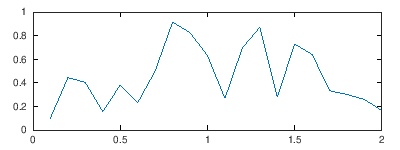

In [15]:
u=rand(1,20);
for i=1:20 v(i)=i*0.1; endfor;

figure(1, 'position',[0,0,400,150]);
plot(v,u,"linewidth",3)

In [16]:
#számoljuk ki a görbe alatti területet (integráljunk)
trapz(v,u) #integrálás trapézszabállyal

quad('cos',0,pi/2) #integrálás gauss kvadratúrával, egzakt
#quadnak az integrálandó függvényt adjuk meg (integrandus) és az integrálási határokat

ans =  0.89925
ans =  1.00000


$\int x^{n}\mathrm{d}x=\frac{x^{n+1}}{n+1}+c, \quad n\in \mathbb{R}, n\neq-1$<br>
$\int_{0}^{1}x^{2}\mathrm{d}x=\left[\frac{x^{3}}{3}\right]_{0}^{1}=\frac{1}{3}-0=0.3333$

In [17]:
function y = f(x) y = x*x; endfunction;
quad('f',0,1) #vs Newton-Leibniz tétel

ans =  0.33333


#### Polinomok<br>
polinom: $f(x)=\sum\limits_{i=0}^{n}a_{i}x^{i}=a_{0}x^{0}+a_{1}x^{1}+a_{2}x^{2}+\ldots+a_{n}x^{n}=a_{0}+a_{1}x+a_{2}x^{2}+\ldots+a_{n}x^{n}$, $n$-ed fokú polinom, $a_{0}$ konstans tag<br>

konvolúció: szorzok két polinomot, jelölés csillaggal<br>
$f*g=\sum\limits_{k=0}^{m+n}(\sum\limits_{j=0}^{k}a_{k-j}b_{j})x^{k}$, octave elvégzi<br>


polinom megadása octaveban: koefficiens vektorral, fokszám szerinti csökkenő sorrendben, utolsó a konstans tag<br>

$c=2x^{4}+3x^{3}+4x^{2}+5x+1\quad\quad\quad$ c = \[2,3,4,5,1\];<br> 
$a=x^{3}+2x^{2}+3x+4\quad\quad\quad\quad\quad\quad$    a = \[1,2,3,4\];<br> 
$a*c=2x^{7}+7x^{6}+16x^{5}+30x^{4}+35x^{3}+33x^{2}+23x+4\quad$ conv(a,c)



In [18]:
c=[2,3,4,5,1] ;     
a=[1,2,3,4]; 
conv(a,c) #konvolúció - két polinom szorzata

ans =

    2    7   16   30   35   33   23    4



In [19]:
polyder(a)           # polinom deriváltja

polyder(conv(a,c))   # két polinom konvolúciójának deriváltja
#vagy
[k]=polyder(a,c)

[q,r]=polyder(a,c)   # a/c hányados (racionális törtfüggvény) deriváltja, q: derivált számláló, r: derivált nevező

ans =

   3   4   3

ans =

    14    42    80   120   105    66    23

k =

    14    42    80   120   105    66    23

q =

   -0.50000   -2.00000   -5.00000  -10.00000   -8.75000   -7.00000   -4.25000

r =

 Columns 1 through 7:

    1.00000    3.00000    6.25000   11.00000   12.50000   11.50000    8.25000

 Columns 8 and 9:

    2.50000    0.25000



In [20]:
# polinom gyökei
a=[1,2,3,4]; 
r = roots(a) # valós gyökök, komplex gyökök, polinomnak annyi gyöke van ahányad rendű
polyval(a,r) # ellenőrzés, polinom helyettesítési értéke (Horner-módszer) a kapott gyököknél zérus

r =

  -1.65063 + 0.00000i
  -0.17469 + 1.54687i
  -0.17469 - 1.54687i

ans =

  -8.8818e-16 + 0.0000e+00i
  -4.4409e-15 + 6.6613e-16i
  -4.4409e-15 - 6.6613e-16i



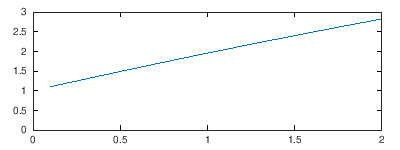

In [21]:
#polinomillesztés, legkisebb négyzetek módszerével
for i=1:20 v(i)=i*0.1; endfor; # 0.1...2.0
for i=1:20 u(i)=v(i)+cos(v(i)*0.3); endfor;

figure(1, 'position',[0,0,400,150]);
plot(v,u,"linewidth",3)
ylim([0,3])

In [22]:
p = polyfit(v,u,5)  # illesztés ötödfokú polinommal
#p = polyfit(v,u,4) # illesztés negyedfokú polinommal
pint = polyint(p)   # illesztett polinom határozatlan integrálja

p =

  -6.2529e-06   3.5244e-04  -1.7165e-05  -4.4990e-02   1.0000e+00   1.0000e+00

pint =

  -0.00000   0.00007  -0.00000  -0.01500   0.50000   1.00000   0.00000



In [23]:
polyval(pint,2)-polyval(pint,0) # Newton-Leibniz: pint határozatlan integrál helyettesítési értékét (polyval) számoljuk
                                # a megadott integrálási határok között (0,2) a határozott integrál értékének kiszámítására
#VS
trapz(v,u)                      # trapézszabály
#VS
function u=fv(v) u=v+cos(v*0.3); endfunction;
quad('fv',0,2)                  # gauss-kvadratúra

ans =  3.8821
ans =  3.7770
ans =  3.8821


#### Interpoláció

In [24]:
format long
# interp1 1D interpoláció
interp1(v,u,1.05) # u(v=1.05)?, u értéke v = 1.05-nél
interp1(v,u,1.05,'linear') # default (legkisebb négyzetek módszere)
interp1(v,u,1.05,'cubic')  # köbös interpoláció
interp1(v,u,1.05,'spline') # köbös spline

polyval(p,1.05) # pontosabbnak kell lennie bármelyiknél
format

ans =  2.00068941632700
ans =  2.00068941632700
ans =  2.00079635831301
ans =  2.00079637690771
ans =  2.00079635991402
